# Import Dependencies

In [3]:
# Import dependencies
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
from config import db_password
from config import db_name

# Data Retrieval

In [4]:
try:
    connection = psycopg2.connect(user = "postgres",
                                  password = db_password,
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = db_name)
    
    print("Connection established...")

    # Read Database Table information into Dataframes
    salary_data = pd.read_sql("SELECT * FROM Salaries", connection)
    
    avg_sal_by_title_query = '''SELECT t.title AS "title",
                                     ROUND(AVG(s.salary),2) AS "avg_salary"
                                FROM employees AS e
                                INNER JOIN Salaries AS s
                                ON e.emp_no = s.emp_no
                                INNER JOIN Titles AS t
                                ON e.emp_title_id = t.title_id
                                GROUP BY t.title'''
    
    avg_sal_by_title_data = pd.read_sql(avg_sal_by_title_query, connection)

    print("Retrieved Database Table information into Dataframes...")

except:
    print("Error while connecting/reading PostgreSQL")
finally:
    # closing database connection.
    if(connection):
        connection.close()
        print("PostgreSQL connection is closed")

Connection established...
Retrieved Database Table information into Dataframes...
PostgreSQL connection is closed


In [5]:
salary_data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [7]:
avg_sal_by_title_data

,title,avg_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


# Data Visualization

## Histogram to Visualize the most common salary ranges

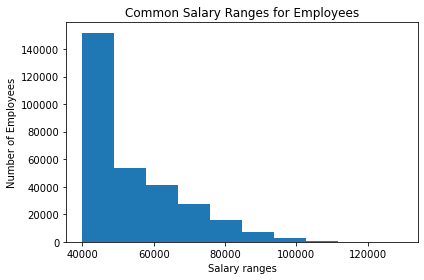

In [8]:
# Generate histogram to visualize the most common salary ranges for employees
plt.hist(salary_data["salary"])

# Set x & y axis labels and title
plt.xlabel("Salary ranges")
plt.ylabel("Number of Employees")
plt.title("Common Salary Ranges for Employees")

# Save and display the plot
plt.tight_layout()
plt.savefig("common_salary_ranges_histogram.png")
plt.show()

## Bar chart of average salary by title

In [9]:
avg_sal_by_title_data = avg_sal_by_title_data.set_index("title")
avg_sal_by_title_data

,avg_salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


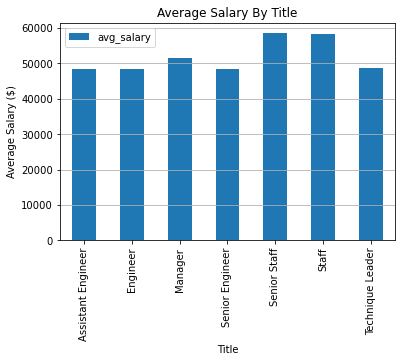

In [10]:
# Create a bar chart of average salary by title
avg_sal_by_title_data.plot(kind="bar")

# Set x & y axis labels and title
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.grid(axis="y")

# Save and display the plot
plt.savefig("avg_salary_by_title_bar.png")
plt.show()

## Analysis

The average salary for all titles seems to be more or less the same which typically would not be the case in real-world data. This proves that the dataset is fake.